In [1]:

import sys
import h5py
import numpy as np
sys.path.append('../')
from nn_utils import NNUtils

In [2]:
ls ..

cat-images/  neural-networks-case-study-02.ipynb  notebook/
datasets/    nn_utils.py                          __pycache__/


In [3]:
train_dataset = h5py.File('../datasets/train_catvnoncat.h5', "r")

train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('../datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [4]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [5]:
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
train_x = train_x_flatten/255
train_x.shape

(12288, 209)

In [6]:
train_set_y_orig.shape

(1, 209)

In [7]:
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
test_x = test_x_flatten/255
test_x.shape

(12288, 50)

# Training model

In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [9]:
parameters = NNUtils.initialize_parameters_deep(layers_dims)
parameters

{'W1': array([[ 0.01465338, -0.00551871, -0.00476469, ..., -0.00475605,
         -0.00343108,  0.00856474],
        [ 0.00910437,  0.00207385, -0.0059909 , ...,  0.00622328,
         -0.0044052 ,  0.00187287],
        [-0.00321458, -0.00176345,  0.00574466, ...,  0.00742212,
         -0.00094203, -0.00593549],
        ...,
        [ 0.00157639, -0.0011742 ,  0.01656117, ..., -0.00832292,
         -0.00744053, -0.00138343],
        [-0.00031528, -0.00376196, -0.00771457, ...,  0.02027339,
         -0.00481399, -0.00026661],
        [-0.01293895, -0.0100192 ,  0.00655218, ...,  0.01983405,
          0.01387618,  0.00673519]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.20259018, -0.3085417 , -0.37746612, -0.04024358,  0.05940078,

==cost=0.7717493284237686 after 0 iterations
==cost=0.6720534400822913 after 100 iterations
==cost=0.6482632048575212 after 200 iterations
==cost=0.6115068816101354 after 300 iterations
==cost=0.5670473268366111 after 400 iterations
==cost=0.5401376634547801 after 500 iterations
==cost=0.5279299569455267 after 600 iterations
==cost=0.4654773771766852 after 700 iterations
==cost=0.36912585249592794 after 800 iterations
==cost=0.3917469743480535 after 900 iterations
==cost=0.31518698886006163 after 1000 iterations
==cost=0.2726998441789385 after 1100 iterations
==cost=0.2374185340026814 after 1200 iterations
==cost=0.19960120532208644 after 1300 iterations
==cost=0.18926300388463305 after 1400 iterations
==cost=0.1611885466582775 after 1500 iterations
==cost=0.14821389662363316 after 1600 iterations
==cost=0.1377748781297294 after 1700 iterations
==cost=0.1297401754919012 after 1800 iterations
==cost=0.12122535068005211 after 1900 iterations
==cost=0.11382060668633714 after 2000 iteratio

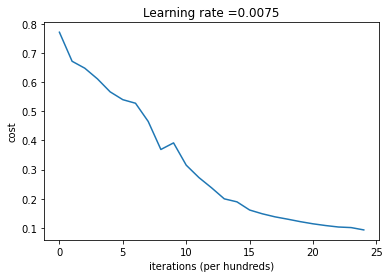

In [10]:
parameters = NNUtils.l_layer_model(
    train_x, 
    train_set_y_orig, 
    layers_dims, 
    num_iterations=2500, 
    print_cost=True)

In [11]:
predictions = NNUtils.predict(train_x, parameters)

In [12]:
NNUtils.measure_accuracy(predictions, train_set_y_orig)

98.56459330143541

In [13]:
predictions_test = NNUtils.predict(test_x, parameters)

In [14]:
NNUtils.measure_accuracy(predictions_test, test_set_y_orig)

80.0

array([[0]])

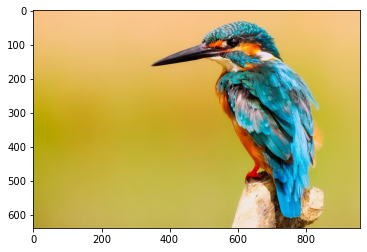

In [17]:
image_path = '../cat-images/bird-1.jpg'
NNUtils.predict_image_path(image_path, parameters)